In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(sns.__version__)

import sklearn as sk
from sklearn.model_selection import  train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

import warnings; warnings.filterwarnings('ignore')
seed = 415
np.random.seed(seed)

0.13.2


### Load matches data

In [2]:
df = pd.read_csv('PL_matches.csv')
display(df.head())

# drop columns
df_known_aprori  = df.drop(columns=['away_clearances', 'away_corners', 'away_fouls_conceded', 'away_offsides', 'away_passes', 'away_possession', 'away_red_cards', 'away_shots', 'away_shots_on_target', 'away_tackles', 'away_touches', 'away_yellow_cards', 'home_clearances', 'home_corners', 'home_fouls_conceded', 'home_offsides', 'home_passes', 'home_possession', 'home_red_cards', 'home_shots', 'home_shots_on_target', 'home_tackles', 'home_touches', 'home_yellow_cards'])

features = df_known_aprori.columns.tolist()
features.sort()
print(features)

display(df_known_aprori.head())

shape_vector = df_known_aprori.shape
print(shape_vector)

,home_team,away_team,result_full,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,...,red_cards_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away
0,Blackpool,West Bromwich Albion,2-1,15.0,8.0,16.0,2.0,550.0,65.4,0.0,...,0.1,4.1,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78
1,Liverpool,Manchester City,3-0,16.0,6.0,6.0,5.0,527.0,53.1,0.0,...,0.2,4.6,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32
2,Manchester United,Arsenal,1-0,26.0,5.0,9.0,3.0,430.0,46.1,0.0,...,0.2,6.3,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38
3,Stoke City,Aston Villa,2-1,26.0,8.0,12.0,2.0,277.0,43.3,0.0,...,0.0,3.3,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00
4,Fulham,Chelsea,0-0,50.0,4.0,11.0,1.0,333.0,37.4,0.0,...,0.0,6.3,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48


['away_team', 'clearances_avg_away', 'clearances_avg_home', 'corners_avg_away', 'corners_avg_home', 'fouls_conceded_avg_away', 'fouls_conceded_avg_home', 'goals_conced_ft_avg_away', 'goals_conced_ft_avg_home', 'goals_conced_ht_avg_away', 'goals_conced_ht_avg_home', 'goals_scored_ft_avg_away', 'goals_scored_ft_avg_home', 'goals_scored_ht_avg_away', 'goals_scored_ht_avg_home', 'home_team', 'offsides_avg_away', 'offsides_avg_home', 'passes_avg_away', 'passes_avg_home', 'possession_avg_away', 'possession_avg_home', 'red_cards_avg_away', 'red_cards_avg_home', 'result_full', 'sg_match_ft_acum_away', 'sg_match_ft_acum_home', 'shots_on_target_avg_away', 'shots_on_target_avg_home', 'tackles_avg_away', 'tackles_avg_home', 'touches_avg_away', 'touches_avg_home', 'yellow_cards_avg_away', 'yellow_cards_avg_home']


,home_team,away_team,result_full,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,...,red_cards_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away
0,Blackpool,West Bromwich Albion,2-1,38.4,4.6,11.3,3.4,407.9,48.3,0.1,...,0.1,4.1,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78
1,Liverpool,Manchester City,3-0,29.8,5.6,12.3,2.2,440.1,52.7,0.1,...,0.2,4.6,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32
2,Manchester United,Arsenal,1-0,29.1,6.1,10.8,2.9,517.3,57.6,0.0,...,0.2,6.3,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38
3,Stoke City,Aston Villa,2-1,32.3,4.0,13.7,2.0,256.0,35.7,0.0,...,0.0,3.3,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00
4,Fulham,Chelsea,0-0,38.7,5.0,12.1,2.9,446.8,51.6,0.0,...,0.0,6.3,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48


(3957, 35)


### Classify Result 
Home team win 0 <br>
Away team win 1 <br>
Tie 2 <br>

In [3]:
df_known_aprori[['home_score', 'away_score']] = df_known_aprori['result_full'].str.split('-', expand=True).astype(int)

def classify_result(row):
    if row['home_score'] > row['away_score']:
        return 0
    elif row['home_score'] < row['away_score']:
        return 1
    else:
        return 2
    
df_known_aprori['target'] = df_known_aprori.apply(classify_result, axis=1)


display(df_known_aprori.head(10))


df_known_aprori['goal_difference'] = abs(df_known_aprori['home_score'] - df_known_aprori['away_score'])



df_known_aprori  = df_known_aprori.drop(columns=['away_team', 'home_team', 'away_score', 'home_score', 'goal_difference', 'result_full'])
display(df_known_aprori.head())


target_counts = df_known_aprori.target.value_counts()
target_props= df_known_aprori.target.value_counts(normalize=True)
display(pd.DataFrame({'counts': target_counts, 'proportions': target_props}))

,home_team,away_team,result_full,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,...,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,home_score,away_score,target
0,Blackpool,West Bromwich Albion,2-1,38.4,4.6,11.3,3.4,407.9,48.3,0.1,...,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,2,1,0
1,Liverpool,Manchester City,3-0,29.8,5.6,12.3,2.2,440.1,52.7,0.1,...,681.4,2.0,1.61,0.87,23.0,0.87,0.32,3,0,0
2,Manchester United,Arsenal,1-0,29.1,6.1,10.8,2.9,517.3,57.6,0.0,...,748.0,1.8,2.12,1.12,16.0,0.94,0.38,1,0,0
3,Stoke City,Aston Villa,2-1,32.3,4.0,13.7,2.0,256.0,35.7,0.0,...,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,2,1,0
4,Fulham,Chelsea,0-0,38.7,5.0,12.1,2.9,446.8,51.6,0.0,...,728.6,1.4,1.84,0.88,24.0,0.84,0.48,0,0,2
5,Blackburn Rovers,Sunderland,0-0,42.6,5.0,14.3,2.6,276.9,40.1,0.0,...,554.3,1.4,1.00,1.00,0.0,0.29,0.29,0,0,2
6,Manchester City,Everton,1-2,32.1,5.6,13.5,3.1,482.3,54.0,0.2,...,630.5,1.3,1.06,1.18,-2.0,0.41,0.65,1,2,1
7,Sunderland,Everton,2-2,37.4,4.8,12.4,2.4,349.7,46.5,0.2,...,638.8,1.0,1.08,1.00,1.0,0.38,0.54,2,2,2
8,Manchester City,Liverpool,3-0,29.0,3.0,16.0,1.0,626.0,60.8,0.0,...,531.0,1.0,1.00,1.00,0.0,0.00,0.00,3,0,0
9,Bolton Wanderers,Chelsea,0-4,39.1,4.7,13.7,1.4,333.2,46.0,0.2,...,724.3,1.5,1.73,0.86,19.0,0.77,0.45,0,4,1


,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,shots_on_target_avg_home,tackles_avg_home,touches_avg_home,...,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,target
0,38.4,4.6,11.3,3.4,407.9,48.3,0.1,4.4,18.8,619.1,...,4.1,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,0
1,29.8,5.6,12.3,2.2,440.1,52.7,0.1,5.3,24.0,659.5,...,4.6,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,0
2,29.1,6.1,10.8,2.9,517.3,57.6,0.0,5.6,17.3,726.1,...,6.3,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,0
3,32.3,4.0,13.7,2.0,256.0,35.7,0.0,4.0,18.3,442.0,...,3.3,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0
4,38.7,5.0,12.1,2.9,446.8,51.6,0.0,4.5,21.3,669.1,...,6.3,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,2


,counts,proportions
target,,
0,1795,0.453626
1,1189,0.300480
2,973,0.245893


## Create a correlation matrix

In [4]:
corr_matrix = df_known_aprori.drop(columns=['target']).corr().abs()

corr_df = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
corr_df = corr_df.stack().reset_index()
corr_df.columns = ['Variable Group 1', 'Variable Group 2', 'PCC']

corr_df = corr_df[np.abs(corr_df['PCC'])> 0.7]

corr_df = corr_df.sort_values(by='PCC', ascending=False)

display(corr_df)

,Variable Group 1,Variable Group 2,PCC
122,passes_avg_home,touches_avg_home,0.990809
434,passes_avg_away,touches_avg_away,0.990702
148,possession_avg_home,touches_avg_home,0.950461
444,possession_avg_away,touches_avg_away,0.949458
118,passes_avg_home,possession_avg_home,0.935083
430,passes_avg_away,possession_avg_away,0.934452
488,goals_scored_ft_avg_away,goals_scored_ht_avg_away,0.802953
288,goals_scored_ft_avg_home,goals_scored_ht_avg_home,0.797851
463,shots_on_target_avg_away,goals_scored_ft_avg_away,0.782077
199,shots_on_target_avg_home,goals_scored_ft_avg_home,0.774993


## Remove highly correlated answers

In [5]:
df_known_aprori = df_known_aprori.drop(columns=['touches_avg_home', 'touches_avg_away', 'touches_avg_home', 'touches_avg_away', 'possession_avg_home', 'possession_avg_away', 'goals_scored_ht_avg_away', 'goals_scored_ht_avg_home', 'goals_scored_ft_avg_away', 'goals_scored_ft_avg_home', 'goals_conced_ht_avg_home', 'goals_conced_ht_avg_away'])
display(df_known_aprori.head(10))

,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,red_cards_avg_home,shots_on_target_avg_home,tackles_avg_home,yellow_cards_avg_home,goals_conced_ft_avg_home,...,fouls_conceded_avg_away,offsides_avg_away,passes_avg_away,red_cards_avg_away,shots_on_target_avg_away,tackles_avg_away,yellow_cards_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,target
0,38.4,4.6,11.3,3.4,407.9,0.1,4.4,18.8,1.2,2.22,...,10.8,2.7,371.0,0.1,4.1,20.0,1.6,1.67,-2.0,0
1,29.8,5.6,12.3,2.2,440.1,0.1,5.3,24.0,1.6,1.23,...,13.3,3.0,467.2,0.2,4.6,22.0,2.0,0.87,23.0,0
2,29.1,6.1,10.8,2.9,517.3,0.0,5.6,17.3,1.6,1.07,...,12.9,2.5,521.4,0.2,6.3,21.2,1.8,1.12,16.0,0
3,32.3,4.0,13.7,2.0,256.0,0.0,4.0,18.3,2.3,2.00,...,16.3,2.3,344.0,0.0,3.3,25.0,2.0,2.00,-2.0,0
4,38.7,5.0,12.1,2.9,446.8,0.0,4.5,21.3,1.1,1.08,...,11.4,3.1,511.8,0.0,6.3,19.4,1.4,0.88,24.0,2
5,42.6,5.0,14.3,2.6,276.9,0.0,3.1,21.0,1.6,1.14,...,10.9,1.4,342.0,0.3,2.6,22.0,1.4,1.00,0.0,2
6,32.1,5.6,13.5,3.1,482.3,0.2,4.6,23.1,2.1,0.76,...,12.9,2.7,410.9,0.1,4.7,21.4,1.3,1.18,-2.0,1
7,37.4,4.8,12.4,2.4,349.7,0.2,3.4,22.8,1.6,1.00,...,13.5,2.4,419.5,0.1,4.6,19.8,1.0,1.00,1.0,2
8,29.0,3.0,16.0,1.0,626.0,0.0,2.0,28.0,2.0,0.00,...,15.0,5.0,303.0,1.0,4.0,30.0,1.0,1.00,0.0,0
9,39.1,4.7,13.7,1.4,333.2,0.2,4.8,25.7,1.7,1.35,...,11.6,3.0,508.5,0.0,6.0,19.2,1.5,0.86,19.0,1


### Train random forest models

In [6]:
from sklearn.ensemble import RandomForestClassifier

y = df_known_aprori['target']
X = df_known_aprori.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed) # stratify=y

oob_scores_sqrt = []
oob_scores_log2 = []
oob_scores_none = []

trees = range(3, 264, 20)


for n in trees:

    #Define the classifiers
    football_rf_sqrt = RandomForestClassifier(n_estimators=n, # Number of trees to train
                        criterion='entropy', # How to train the trees. Also supports entropy.
                        max_depth=None, # Max depth of the trees. Not necessary to change.
                        min_samples_split=2, # Minimum samples to create a split.
                        min_samples_leaf=0.001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
                        min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
                        max_features="sqrt", # Maximum number of features per split (not tree!) by default is sqrt(vars)
                        max_leaf_nodes=None, # Maximum number of nodes.
                        min_impurity_decrease=0.0001, # Minimum impurity decrease. This is 10^-3.
                        bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false. If False, the whole dataset is used to build each tree.
                        oob_score=True,  # If report accuracy with non-selected cases.
                        n_jobs=-1, # Parallel processing. Set to -1 for all cores. Watch your RAM!!
                        random_state=seed, # Seed
                        verbose=1, # If to give info during training. Set to 0 for silent training.
                        warm_start=False, # If train over previously trained tree.
                        class_weight='balanced'
                                        )
    model_rf_sqrt = football_rf_sqrt.fit(X_train, y_train)
    oob_scores_sqrt.append(football_rf_sqrt.oob_score_)

    football_rf_log2 = RandomForestClassifier(n_estimators=n, # Number of trees to train
                        criterion='entropy', # How to train the trees. Also supports entropy.
                        max_depth=None, # Max depth of the trees. Not necessary to change.
                        min_samples_split=2, # Minimum samples to create a split.
                        min_samples_leaf=0.001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
                        min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
                        max_features="log2", # Maximum number of features per split (not tree!) by default is sqrt(vars)
                        max_leaf_nodes=None, # Maximum number of nodes.
                        min_impurity_decrease=0.0001, # Minimum impurity decrease. This is 10^-3.
                        bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false. If False, the whole dataset is used to build each tree.
                        oob_score=True,  # If report accuracy with non-selected cases.
                        n_jobs=-1, # Parallel processing. Set to -1 for all cores. Watch your RAM!!
                        random_state=seed, # Seed
                        verbose=1, # If to give info during training. Set to 0 for silent training.
                        warm_start=False, # If train over previously trained tree.
                        class_weight='balanced'
                                        )
    model_rf_log2 = football_rf_log2.fit(X_train, y_train)
    oob_scores_log2.append(football_rf_log2.oob_score_)

    football_rf_none = RandomForestClassifier(n_estimators=n, # Number of trees to train
                        criterion='entropy', # How to train the trees. Also supports entropy.
                        max_depth=None, # Max depth of the trees. Not necessary to change.
                        min_samples_split=2, # Minimum samples to create a split.
                        min_samples_leaf=0.001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
                        min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
                        max_features=None, # Maximum number of features per split (not tree!) by default is sqrt(vars)
                        max_leaf_nodes=None, # Maximum number of nodes.
                        min_impurity_decrease=0.0001, # Minimum impurity decrease. This is 10^-3.
                        bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false. If False, the whole dataset is used to build each tree.
                        oob_score=True,  # If report accuracy with non-selected cases.
                        n_jobs=-1, # Parallel processing. Set to -1 for all cores. Watch your RAM!!
                        random_state=seed, # Seed
                        verbose=1, # If to give info during training. Set to 0 for silent training.
                        warm_start=False, # If train over previously trained tree.
                        class_weight='balanced'
                                    )
    model_rf_none = football_rf_none.fit(X_train, y_train)
    oob_scores_none.append(football_rf_none.oob_score_)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parall

### Find the best Out-Of-Bag (OOB) scores

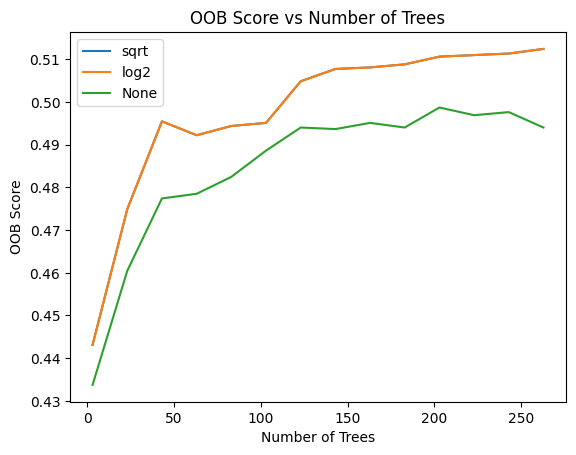

The best OOB scores are obtained with max_features='sqrt' and 'log2'. Both produce equivalent results. We will use sqrt for the rest of the analysis.


In [7]:
plt.plot(trees, oob_scores_sqrt, label='sqrt')
plt.plot(trees, oob_scores_log2, label='log2')
plt.plot(trees, oob_scores_none, label='None')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Score')
plt.title('OOB Score vs Number of Trees')
plt.legend()
plt.show()
print("The best OOB scores are obtained with max_features='sqrt' and 'log2'. Both produce equivalent results. We will use sqrt for the rest of the analysis.")

### Create a confusion matrix

The best OOB scores are obtained with max_features='sqrt' and 'log2'. Both produce equivalent results. The n_estimators is 264 produce the highest OOBScore.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 264 out of 264 | elapsed:    0.1s finished


Accuracy: 0.531986531986532
Confusion Matrix:
 [[387 108  39]
 [138 206  27]
 [146  98  39]]
Confusion Matrix Proportions:
 [[0.7247191  0.20224719 0.07303371]
 [0.37196765 0.55525606 0.07277628]
 [0.51590106 0.34628975 0.13780919]]
          HT Win    AT Win      Draw
HT Win  0.724719  0.202247  0.073034
AT Win  0.371968  0.555256  0.072776
Draw    0.515901  0.346290  0.137809
(3, 3)


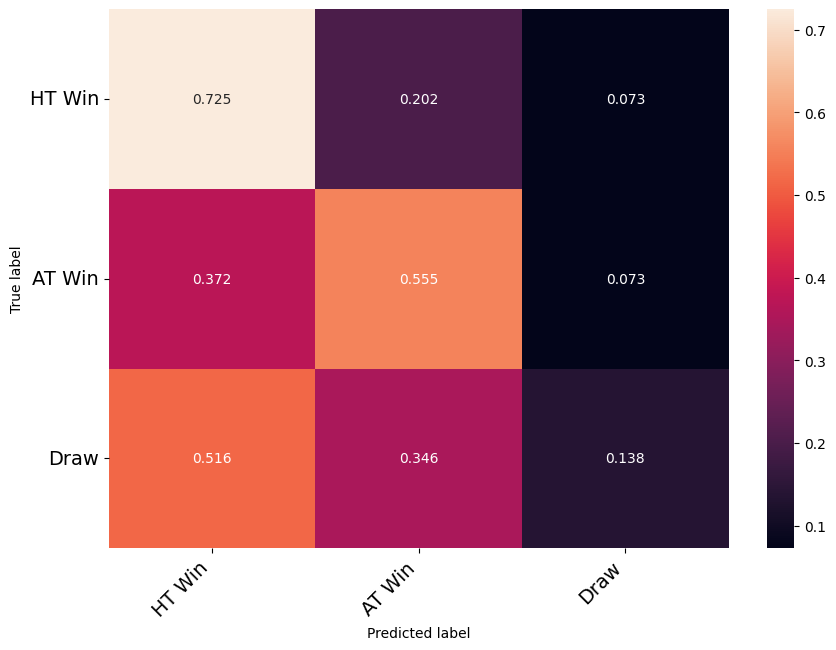

In [8]:
print("The best OOB scores are obtained with max_features='sqrt' and 'log2'. Both produce equivalent results. The n_estimators is 264 produce the highest OOBScore.")

best_clf =  football_rf_sqrt = RandomForestClassifier(n_estimators=264, # Number of trees to train
                        criterion='entropy', # How to train the trees. Also supports entropy.
                        max_depth=None, # Max depth of the trees. Not necessary to change.
                        min_samples_split=2, # Minimum samples to create a split.
                        min_samples_leaf=0.001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
                        min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
                        max_features="sqrt", # Maximum number of features per split (not tree!) by default is sqrt(vars)
                        max_leaf_nodes=None, # Maximum number of nodes.
                        min_impurity_decrease=0.0001, # Minimum impurity decrease. This is 10^-3.
                        bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false. If False, the whole dataset is used to build each tree.
                        oob_score=True,  # If report accuracy with non-selected cases.
                        n_jobs=-1, # Parallel processing. Set to -1 for all cores. Watch your RAM!!
                        random_state=seed, # Seed
                        verbose=1, # If to give info during training. Set to 0 for silent training.
                        warm_start=False, # If train over previously trained tree.
                        class_weight='balanced'
                                        )

best_clf.fit(X_train, y_train)
y_pred_best = best_clf.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred_best)
print("Accuracy:", accuracy1)
confusion_mat = confusion_matrix(y_true = y_test, y_pred = y_pred_best)
print("Confusion Matrix:\n", confusion_mat)
confusion_mat_prop = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
print("Confusion Matrix Proportions:\n", confusion_mat_prop)

df_cm = pd.DataFrame(confusion_mat_prop, index=['HT Win', 'AT Win', 'Draw'], columns=['HT Win', 'AT Win', 'Draw'])
figsize = (10,7)
fontsize=14

print(df_cm)

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.3f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)

print(np.array(confusion_mat_prop).shape)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()


### Show the best tree

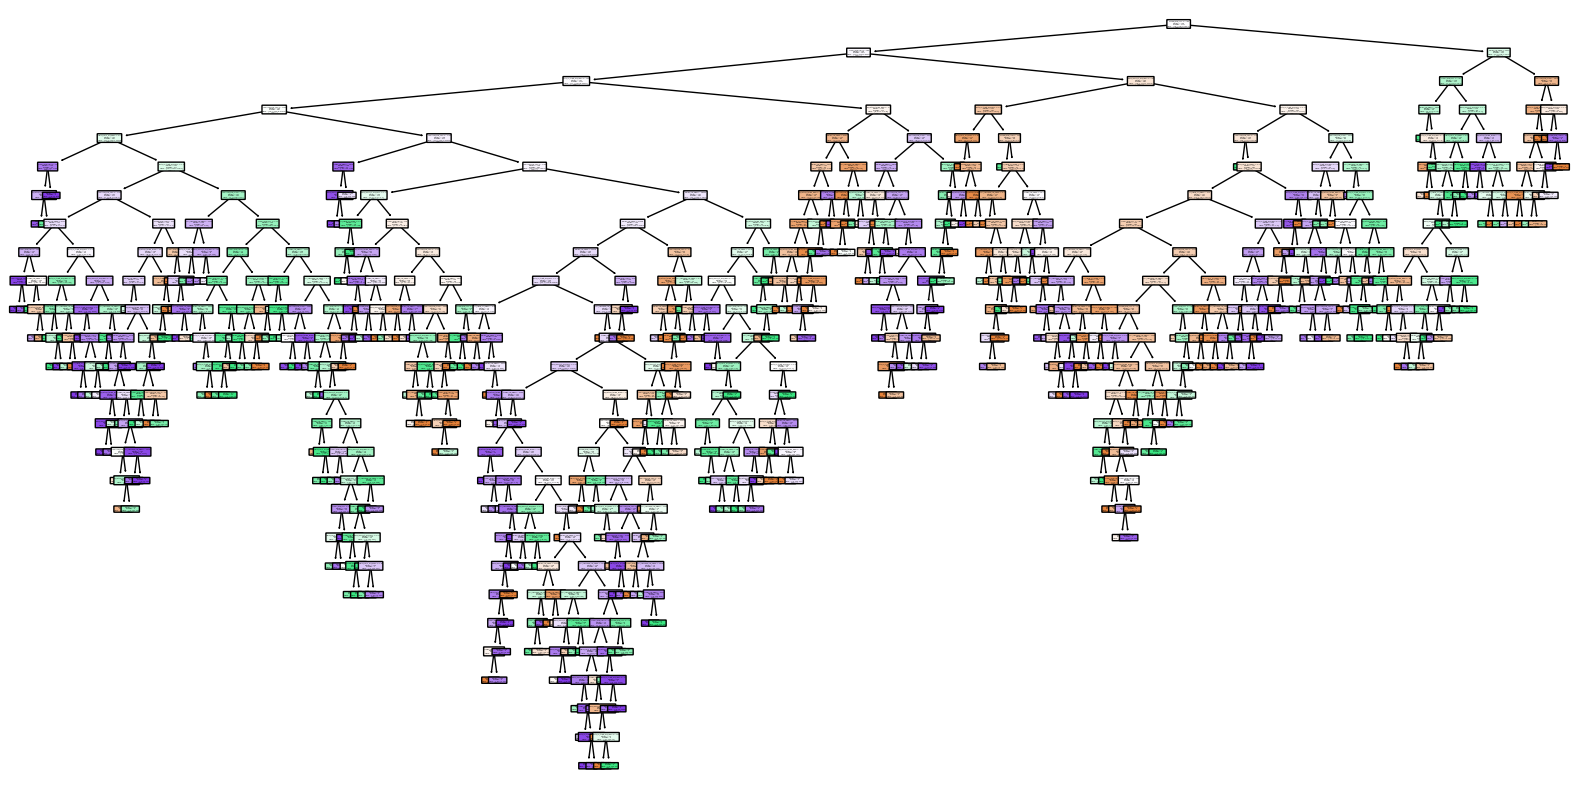

In [9]:
estimator = best_clf.estimators_[4] 

# 2. Create the plot using Matplotlib (No Graphviz needed)
plt.figure(figsize=(20, 10))  # Increase size for readability
plot_tree(estimator, 
          feature_names=X.columns, 
          class_names=['0', '1', '2'], 
          rounded=True, 
          filled=True, 
          precision=2)

# 3. Show or save the plot
plt.show()

### Try a model with XGBOOST

In [10]:
from xgboost import XGBClassifier

# Define the search space for XGBoost hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


xgb = XGBClassifier(random_state=seed)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1)

X_train_search, X_val_search, y_train_search, y_val_search = train_test_split(
    X_train, y_train, train_size=0.4, random_state=seed, stratify=y_train
)

grid_search.fit(X_train_search, y_train_search)

optimal_params = grid_search.best_params_
print("Optimal hyperparameters:", optimal_params)

xgb = XGBClassifier(**optimal_params, random_state=seed)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy of XGBClassifier:", accuracy2)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("\nAccuracy of RandomForestClassifier:", accuracy_rf)
print("Confusion Matrix for RandomForestClassifier:")
print(conf_matrix_rf)

Optimal hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy of XGBClassifier: 0.5336700336700336
Confusion Matrix:
[[451  83   0]
 [188 183   0]
 [207  76   0]]

Accuracy of RandomForestClassifier: 0.5353535353535354
Confusion Matrix for RandomForestClassifier:
[[417  92  25]
 [163 191  17]
 [171  84  28]]
